In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import sys 
sys.path.append('./models/')
from Model import Model 

Importing data

In [2]:
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [3]:
class MovingAverage(Model): 
    def train(self, train_dates, data):
        self.data=data
        self.train_dates=train_dates
        self.value=np.mean(data[-7:])
        self.trained=True
    
    def predict(self, reach, alpha, method='hessian'):
        assert self.trained, 'The model has not been trained yet'
        sigma2=(1/(7-1))*np.sum((self.data[-7:]-self.value)**2)
        self.prediction=np.array([self.value for i in range(reach)])
        m_sampled=[]
        intervals=[self.prediction]
        for i in range(100): 
            
            m_r=self.value+np.random.normal(0, np.sqrt(sigma2), 1)[0]
            m_sampled.append(m_r)
            prediction_sampled=[m_r for i in range(reach)]
            intervals.append(prediction_sampled)
        self.m_sampled=m_sampled
        intervals=np.array(intervals).transpose()
        self.intervals=intervals
        ci_low=np.array([np.quantile(intervals[i], alpha/2) for i in range(reach)])
        ci_high=np.array([np.quantile(intervals[i],1-alpha/2) for i in range(reach)])
        return self.prediction, [ci_low, ci_high]
        

      


In [10]:
mymodel=MovingAverage()
split=30
mymodel.train(dates_of_pandemic[:split], new_deaths[:split])

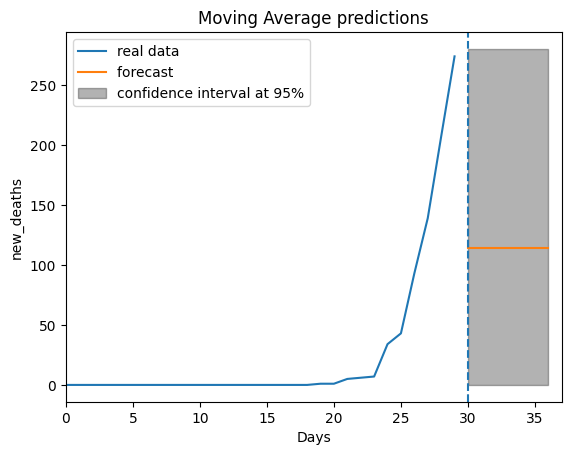

In [11]:
mymodel.plot(7, 0.05, title='Moving Average predictions', xlabel='Days', ylabel='new_deaths')